In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [58]:
# データの読み込み
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# データの確認
train_data['datetime'] = pd.to_datetime(train_data['datetime'])
test_data['datetime'] = pd.to_datetime(test_data['datetime'])

train_data = train_data.rename(columns = {'datetime' : 'ds'}) 
test_data = test_data.rename(columns = {'datetime' : 'ds'}) 

print(f'データ数：{len(train_data)}')
print(train_data.head())
print('データ型:')
print(train_data.dtypes)
print('===========================================================')
print(f'データ数：{len(test_data)}')
print(test_data.head())

データ数：2101
          ds   y  client  close  price_am  price_pm
0 2010-07-01  17       0      0        -1        -1
1 2010-07-02  18       0      0        -1        -1
2 2010-07-03  20       0      0        -1        -1
3 2010-07-04  20       0      0        -1        -1
4 2010-07-05  14       0      0        -1        -1
データ型:
ds          datetime64[ns]
y                    int64
client               int64
close                int64
price_am             int64
price_pm             int64
dtype: object
データ数：365
          ds  client  close  price_am  price_pm
0 2016-04-01       1      0         3         2
1 2016-04-02       0      0         5         5
2 2016-04-03       1      0         2         2
3 2016-04-04       1      0         1         1
4 2016-04-05       0      0         1         1


In [60]:
#訓練データ・テストデータの分割
def split_train_test(data, train_rate):
    # データのtrain_rate分を訓練用データとし、残りをテスト用データとする
    row = round(train_rate * data.shape[0])
    train = data[:row]
    test = data[row:]
    return train, test

In [62]:
data = train_data['y']

# 次元を増やす
y_data = np.expand_dims(data, 1)

# 訓練データ、テストデータの作成
train, test = split_train_test(y_data, 0.795)

In [64]:
from sklearn.preprocessing import StandardScaler

In [66]:
# データの正規化
scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [68]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# window_sizeに分けて時系列データのデータセットを作成
def apply_window(data, window_size):
    
    # データをwindow_sizeごとに分割
    sequence_length = window_size
    window_data = []
    for index in range(len(data) - window_size):
        window = data[index: index + sequence_length]
        window_data.append(window)
    return np.array(window_data)

# N日毎のデータ作成
N = 10
window_size = N
train = apply_window(train, window_size + 1)
test = apply_window(test, window_size + 1)

# 訓練用の入力データ
X_train = train[:, :-1]
# 訓練用の正解ラベル
y_train = train[:,  -1]

# テスト用の入力データ
X_test = test[:, :-1]
# テスト用の正解ラベル
y_test = test[:,  -1]

In [70]:
# 入力データの形式を取得
input_size = X_train.shape[1:]

units = 1
dropout = 0.2

# レイヤーを定義
model = keras.Sequential()
model.add(layers.LSTM(
            input_shape=input_size,
            units=units,
            dropout = dropout,
            return_sequences=False,)) #LSTM層をまだ重ねる場合は"True"にする

#入力層 複数重ねるのも可能
model.add(layers.Dense(units=1)) #unitは出力層のユニット数

#モデル生成
model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error'])
model.fit(X_train, y_train,
          epochs=30, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 - 0s - 11ms/step - loss: 1.0109 - mean_squared_error: 1.0109 - val_loss: 1.1094 - val_mean_squared_error: 1.1094
Epoch 2/30
42/42 - 0s - 946us/step - loss: 0.9576 - mean_squared_error: 0.9576 - val_loss: 1.0136 - val_mean_squared_error: 1.0136
Epoch 3/30
42/42 - 0s - 928us/step - loss: 0.9152 - mean_squared_error: 0.9152 - val_loss: 0.9194 - val_mean_squared_error: 0.9194
Epoch 4/30
42/42 - 0s - 933us/step - loss: 0.8760 - mean_squared_error: 0.8760 - val_loss: 0.8385 - val_mean_squared_error: 0.8385
Epoch 5/30
42/42 - 0s - 920us/step - loss: 0.8337 - mean_squared_error: 0.8337 - val_loss: 0.7747 - val_mean_squared_error: 0.7747
Epoch 6/30
42/42 - 0s - 921us/step - loss: 0.8361 - mean_squared_error: 0.8361 - val_loss: 0.7295 - val_mean_squared_error: 0.7295
Epoch 7/30
42/42 - 0s - 972us/step - loss: 0.8013 - mean_squared_error: 0.8013 - val_loss: 0.6938 - val_mean_squared_error: 0.6938
Epoch 8/30
42/42 - 0s - 953us/step - loss: 0.7817 - mean_squared_error: 0.7817 - val_loss: 0.66

Epoch 1/30
42/42 - 1s - 31ms/step - loss: 0.9973 - mean_squared_error: 0.9973 - val_loss: 1.1566 - val_mean_squared_error: 1.1566
Epoch 2/30
42/42 - 0s - 2ms/step - loss: 0.9017 - mean_squared_error: 0.9017 - val_loss: 1.0584 - val_mean_squared_error: 1.0584
Epoch 3/30
42/42 - 0s - 2ms/step - loss: 0.7673 - mean_squared_error: 0.7673 - val_loss: 0.8748 - val_mean_squared_error: 0.8748
Epoch 4/30
42/42 - 0s - 2ms/step - loss: 0.6464 - mean_squared_error: 0.6464 - val_loss: 0.7364 - val_mean_squared_error: 0.7364
Epoch 5/30
42/42 - 0s - 2ms/step - loss: 0.6021 - mean_squared_error: 0.6021 - val_loss: 0.6797 - val_mean_squared_error: 0.6797
Epoch 6/30
42/42 - 0s - 2ms/step - loss: 0.6014 - mean_squared_error: 0.6014 - val_loss: 0.6569 - val_mean_squared_error: 0.6569
Epoch 7/30
42/42 - 0s - 2ms/step - loss: 0.5900 - mean_squared_error: 0.5900 - val_loss: 0.6368 - val_mean_squared_error: 0.6368
Epoch 8/30
42/42 - 0s - 2ms/step - loss: 0.5714 - mean_squared_error: 0.5714 - val_loss: 0.6162 

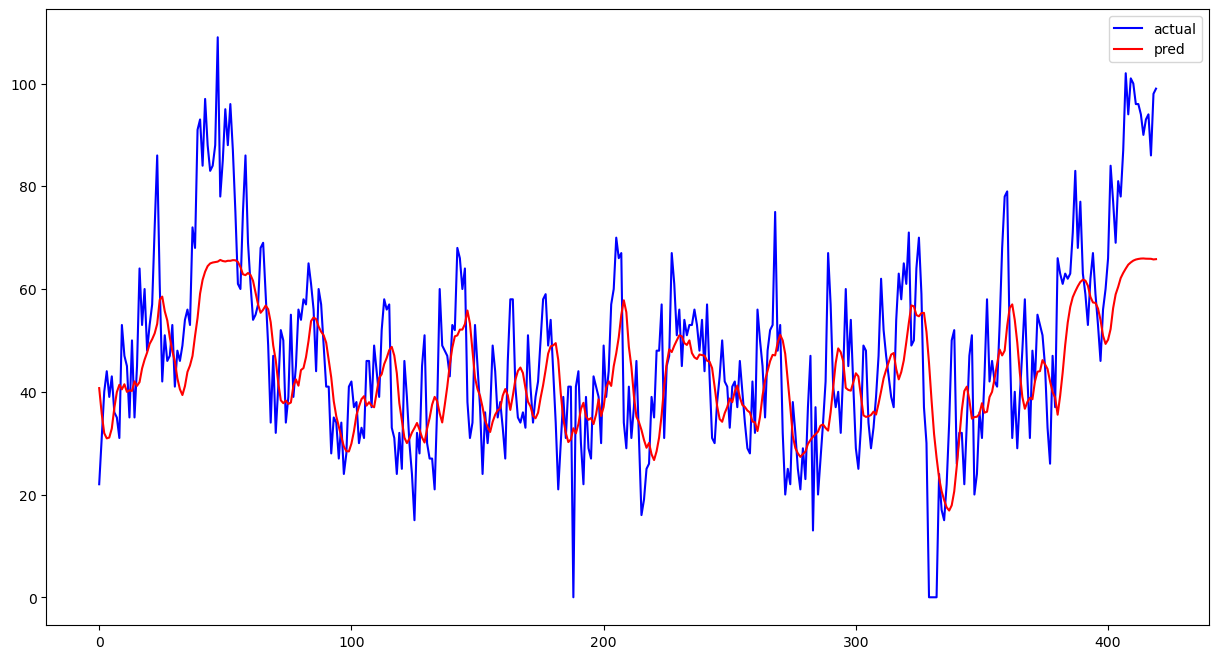

In [71]:
def train_model(X_train, y_train, units=7, dropout = 0.05):
    # 入力データの形式を取得
    input_size = X_train.shape[1:]
    
    # レイヤーを定義
    model = keras.Sequential()
    model.add(layers.LSTM(
            input_shape=input_size,
            units=units,
            dropout = dropout,
            return_sequences=True,))
    model.add(layers.LSTM(
            input_shape=input_size,
            units=units,
            dropout = dropout,
            return_sequences=True,))
    model.add(layers.LSTM(
            input_shape=input_size,
            units=units,
            dropout = dropout,
            return_sequences=False,))
    model.add(layers.Dense(units=2))
    model.add(layers.Dense(units=2))
    model.add(layers.Dense(units=2))
    model.add(layers.Dense(units=1))
    model.add(layers.Dense(units=1))

    model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error'])
    model.fit(X_train, y_train,
                        epochs=30, validation_split=0.205, verbose=2, shuffle=False)
    return model

#予測値取得関数
def predict(data, model):
    pred = model.predict(data,verbose=0)
    return pred.flatten()

# 学習モデルを取得
model = train_model(X_train, y_train)
# 検証データで予測
predicted = predict(X_test, model)

#グラフの描画
plt.figure(figsize=(15, 8))
plt.plot(scaler.inverse_transform(y_test),label='actual',color="b")
plt.plot(scaler.inverse_transform(predicted.reshape(-1, 1)),label='pred',color="r")
plt.legend()
plt.show()

In [106]:
#
# テストデータ（test_data）を使って予測値を出したい
#
print(test_data)
y_data_test = np.expand_dims(test_data['ds'], 1)
y_data_test = scaler.transform(y_data_test)
y_data_test2 = y_data_test[:, :-1]
predicted_2 = predict(y_data_test2, model)

            ds  client  close  price_am  price_pm
0   2016-04-01       1      0         3         2
1   2016-04-02       0      0         5         5
2   2016-04-03       1      0         2         2
3   2016-04-04       1      0         1         1
4   2016-04-05       0      0         1         1
..         ...     ...    ...       ...       ...
360 2017-03-27       0      0         5         4
361 2017-03-28       0      0         4         4
362 2017-03-29       0      0         3         3
363 2017-03-30       0      0         4         3
364 2017-03-31       1      0         5         4

[365 rows x 5 columns]


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [94]:
test_data['price_am']

0      3
1      5
2      2
3      1
4      1
      ..
360    5
361    4
362    3
363    4
364    5
Name: price_am, Length: 365, dtype: int64

In [96]:
y_data_test[:, :-1]

array([], shape=(365, 0), dtype=float64)

In [98]:
test[:, :-1]

array([[[ 0.36050558],
        [ 0.42652645],
        [ 0.88867255],
        ...,
        [ 0.5585682 ],
        [ 0.16244297],
        [ 0.16244297]],

       [[ 0.42652645],
        [ 0.88867255],
        [ 0.42652645],
        ...,
        [ 0.16244297],
        [ 0.16244297],
        [-0.56378661]],

       [[ 0.88867255],
        [ 0.42652645],
        [ 1.28479778],
        ...,
        [ 0.16244297],
        [-0.56378661],
        [ 0.03040123]],

       ...,

       [[ 4.71788307],
        [ 4.1897161 ],
        [ 4.6518622 ],
        ...,
        [ 3.92563262],
        [ 4.12369523],
        [ 4.1897161 ]],

       [[ 4.1897161 ],
        [ 4.6518622 ],
        [ 4.58584133],
        ...,
        [ 4.12369523],
        [ 4.1897161 ],
        [ 3.66154913]],

       [[ 4.6518622 ],
        [ 4.58584133],
        [ 4.32175784],
        ...,
        [ 4.1897161 ],
        [ 3.66154913],
        [ 4.45379959]]])